## Introduction to Matplotlib

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

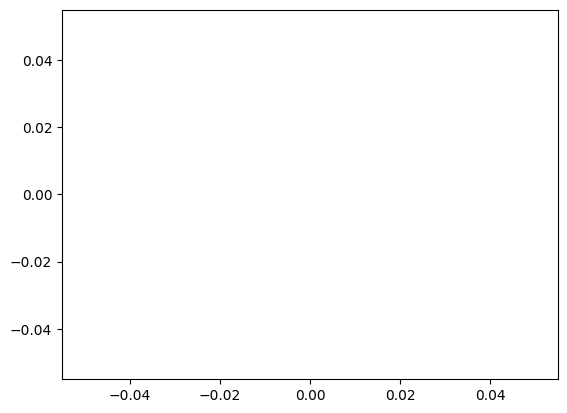

In [6]:

plt.plot();

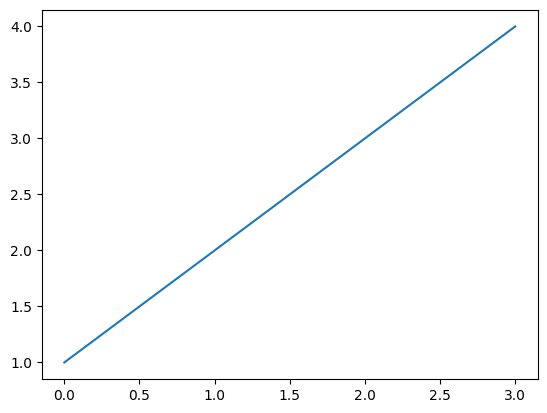

In [7]:
plt.plot([1,2,3,4])
plt.show()

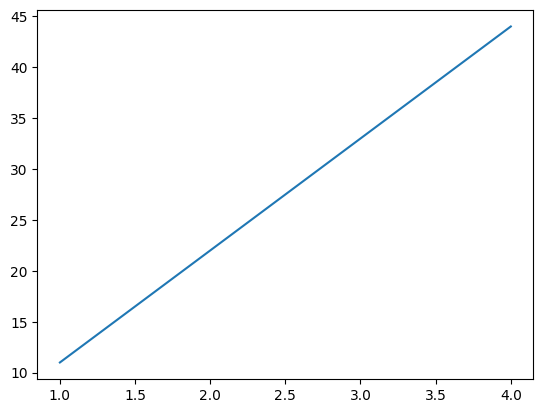

In [9]:
x=[1,2,3,4]
y=[11,22,33,44]
plt.plot(x,y);

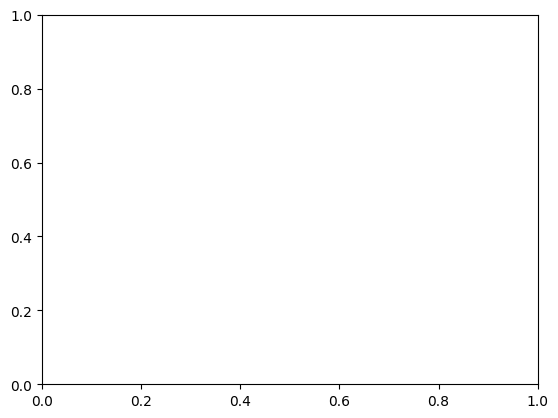

In [10]:
# 1st method
fig=plt.figure() #creates a figure
ax=fig.add_subplot() # adds some axes
plt.show()

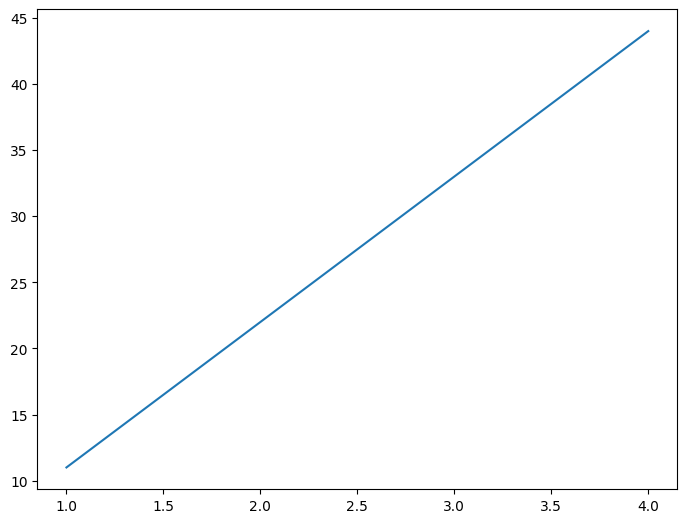

In [11]:
# 2nd method
fig =plt.figure() #creates a figure
ax= fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

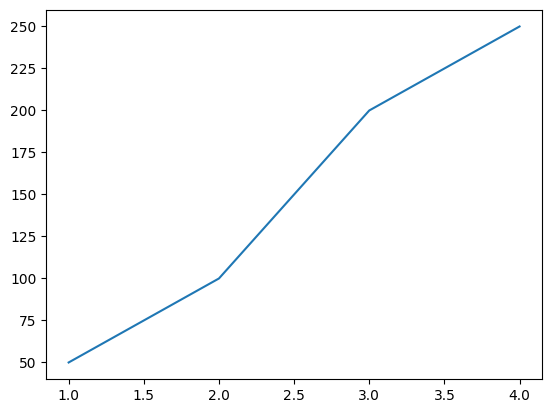

In [13]:
# 3rd method (recommended)
fig,ax=plt.subplots()
ax.plot(x,[50,100,200,250]); # add some data
type(fig), type(ax)

## Matplotlib example workflow

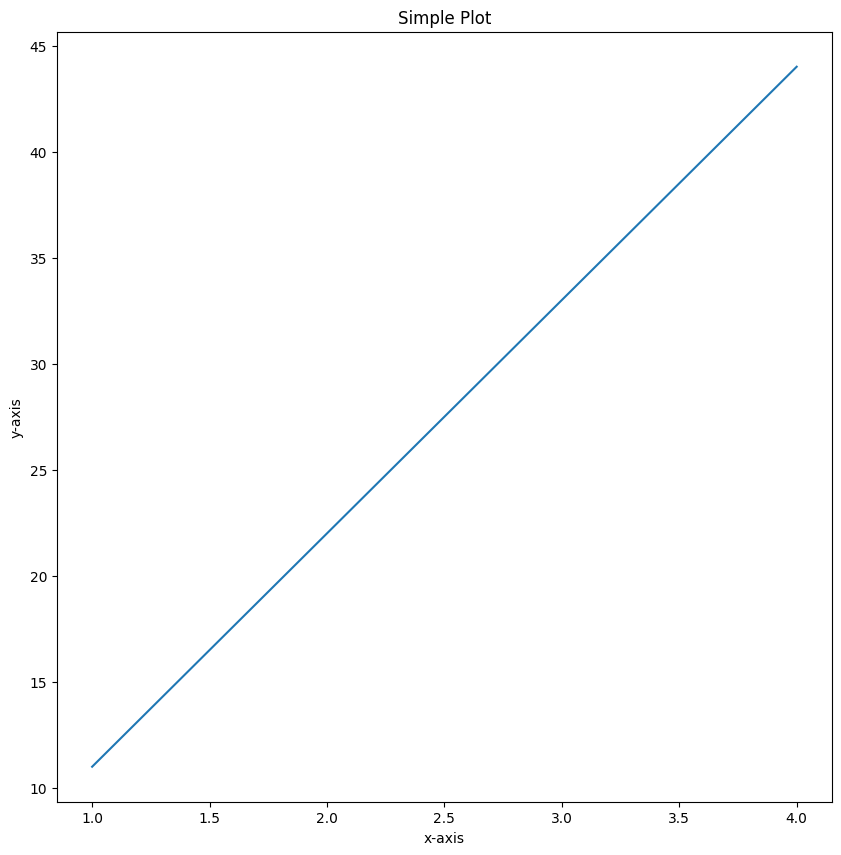

In [15]:
# 0. import matplotlib and get ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x=[1,2,3,4]
y=[11,22,33,44]

# 2.Setup plot
fig,ax=plt.subplots(figsize=(10,10)) #(width, height)
# 3.Plot data

ax.plot(x,y)

# 4. Customize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. Save and show (you save the wholee figure)
fig.savefig("images/sample_plot.png")

## Making figures with NumPy arrays
we want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [19]:
# Create some data
x=np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

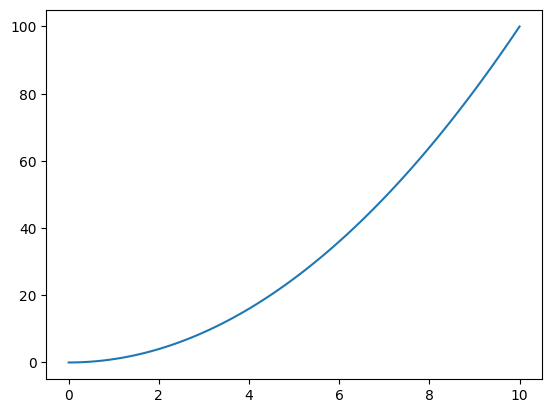

In [22]:
# Plot the data 
fig,ax=plt.subplots()
ax.plot(x,x**2);

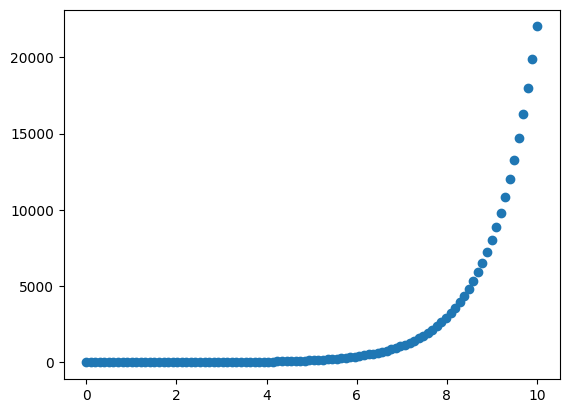

In [23]:
# Use same data to make scatter
fig,ax=plt.subplots()
ax.scatter(x,np.exp(x));

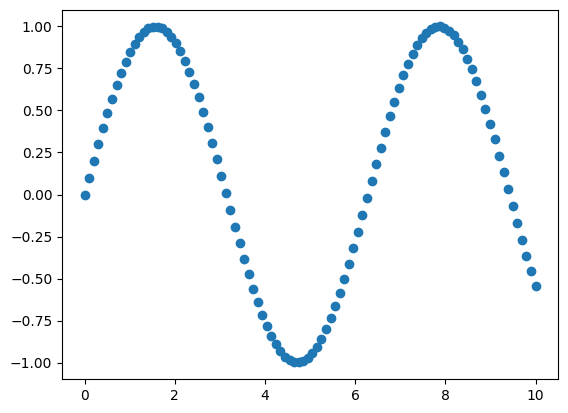

In [24]:
# Another scatter plot
fig,ax=plt.subplots()
ax.scatter(x,np.sin(x));

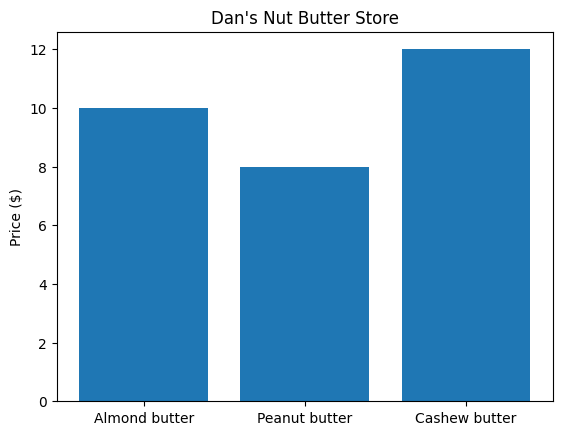

In [31]:
# Make a plot from dictioinary
nut_butter_prices={"Almond butter":10,
                 "Peanut butter":8,
                 "Cashew butter":12}
fig,ax=plt.subplots()
ax.bar(nut_butter_prices.keys(),nut_butter_prices.values()) #(x,y)
ax.set(title="Dan's Nut Butter Store",ylabel="Price ($)");

<BarContainer object of 3 artists>

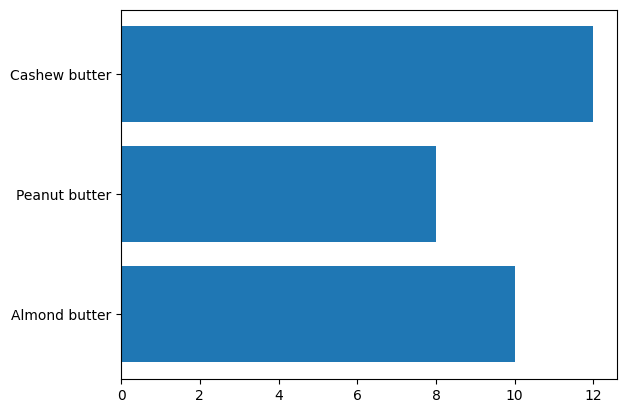

In [33]:
fig,ax=plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()))

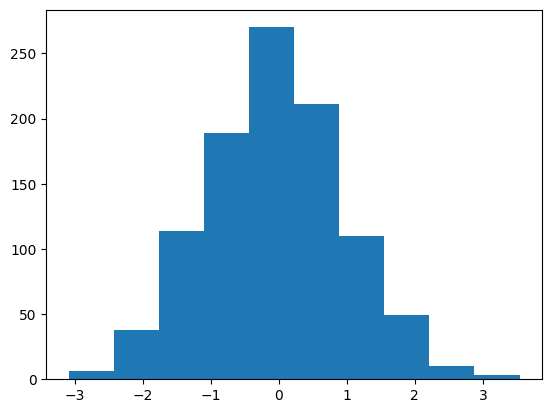

In [37]:
# Make some data for histograms and plot it
x=np.random.randn(1000)
fig,ax=plt.subplots()
ax.hist(x);

## Two options for subplots


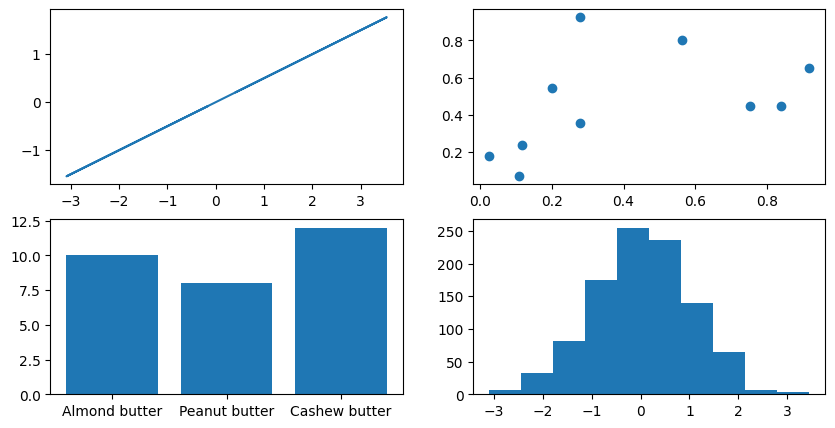

In [47]:
# Subplot option 1
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(nrows=2,
                                       ncols=2,
                                       figsize=(10,5))
# Plot to each different axis
ax1.plot(x,x/2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

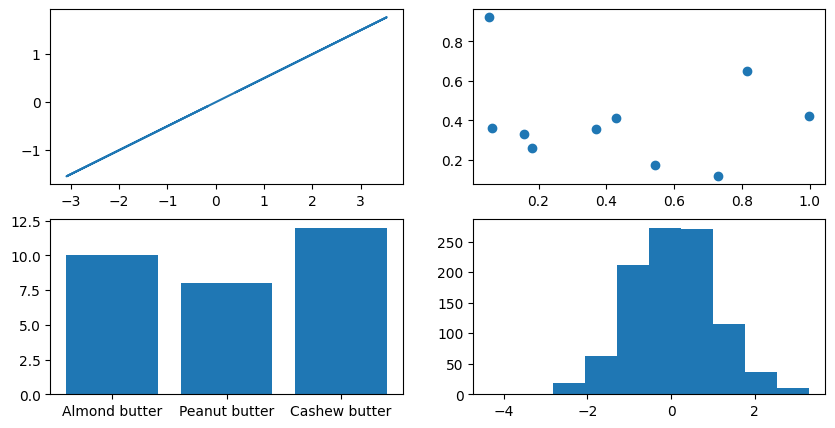

In [51]:
# Subplot option 2
fig,ax=plt.subplots(nrows=2,
                   ncols=2,
                   figsize=(10,5))
# Plot to each different index
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(10),np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames 

In [52]:
import pandas as pd

<AxesSubplot: >

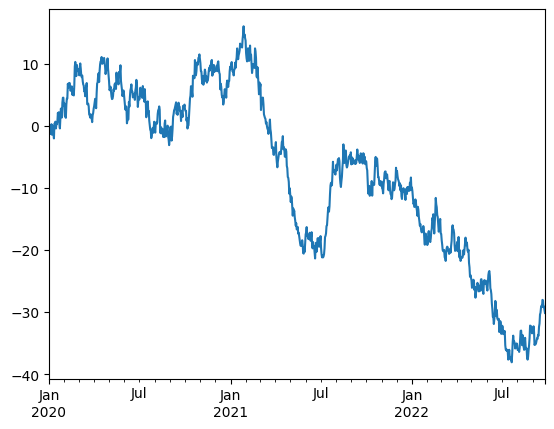

In [59]:
ts= pd.Series(np.random.randn(1000),
             index=pd.date_range("1/1/2020",periods=1000))
ts=ts.cumsum()
ts.plot()

In [72]:
car_sales=pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [73]:
car_sales["Price"]=car_sales["Price"].str.replace('[\$\,\.]','')
car_sales

/var/folders/sc/q8ylxfc139zgn9207t_55r6h0000gn/T/ipykernel_27568/58638859.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"]=car_sales["Price"].str.replace('[\$\,\.]','')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [74]:
# Remove last two zeros
car_sales["Price"]=car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [76]:
car_sales["Sale Date"]=pd.date_range("1/1/2020",periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [77]:
car_sales["Total Sales"]=car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


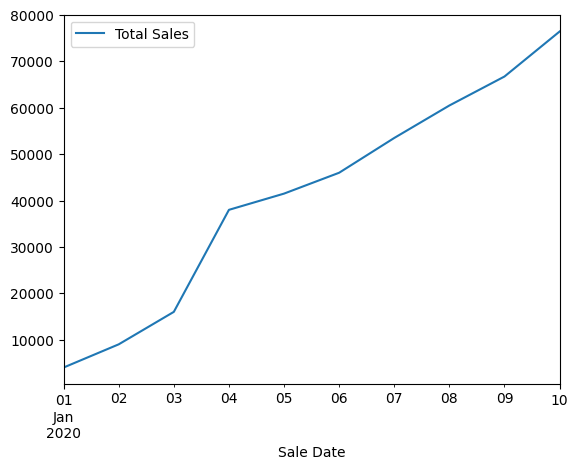

In [78]:
# Let's plot the total sales
car_sales.plot(x="Sale Date",y="Total Sales");

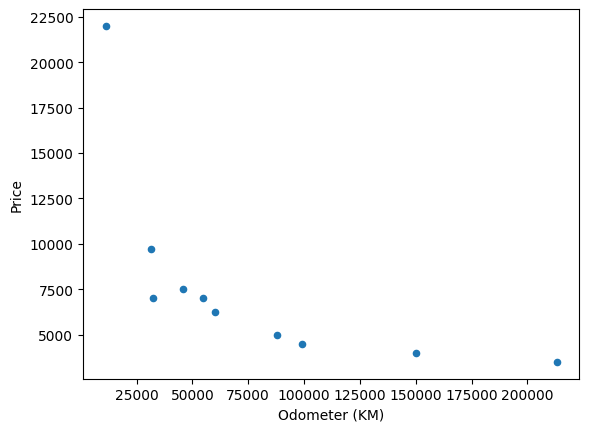

In [82]:
# Reassign price column to int
car_sales["Price"]=car_sales["Price"].astype(int);

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)",y="Price",kind="scatter");


In [83]:
# How about a bar graph?
x=np.random.rand(10,4)   
x
#Turn it into a datafarame
df=pd.DataFrame(x,columns=['a','b','c','d'])
df

,a,b,c,d
0,0.598960,0.170844,0.977149,0.801864
1,0.583036,0.868801,0.211012,0.877026
2,0.243559,0.188782,0.461225,0.903269
3,0.862261,0.825694,0.106073,0.674306
4,0.634707,0.817131,0.366723,0.057272
5,0.725503,0.363594,0.159565,0.358368
6,0.980856,0.537811,0.795308,0.028924
7,0.634991,0.416666,0.590842,0.760835
8,0.734213,0.512549,0.384414,0.351030
9,0.247835,0.478134,0.338302,0.187343


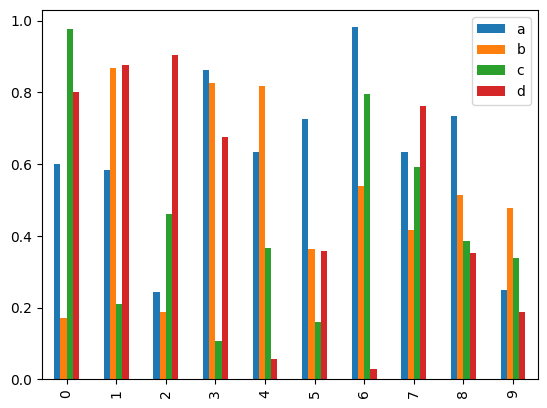

In [85]:
df.plot.bar();

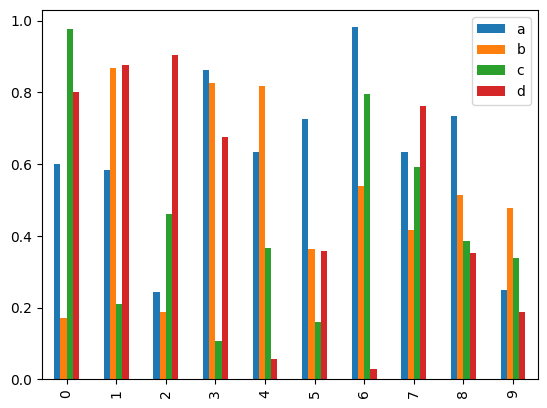

In [86]:
df.plot(kind="bar");

In [87]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


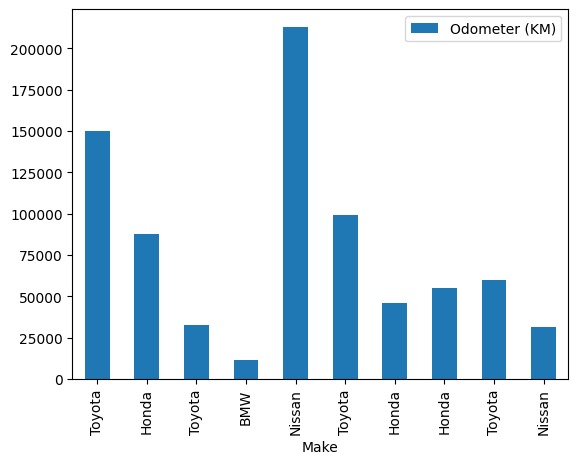

In [88]:
car_sales.plot(x="Make",y="Odometer (KM)",kind="bar");

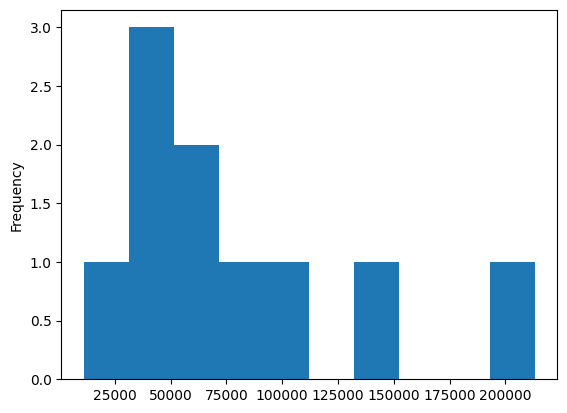

In [89]:
# How about Histograms?

car_sales["Odometer (KM)"].plot.hist();

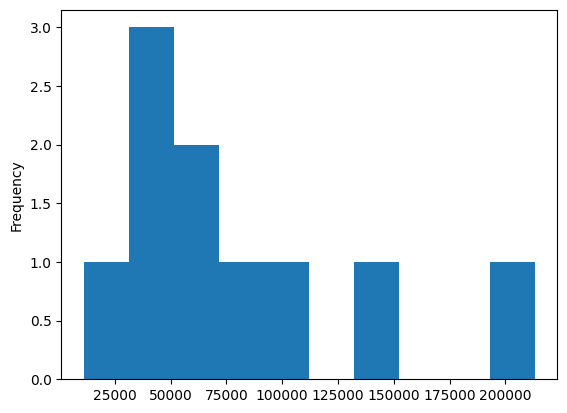

In [90]:
car_sales["Odometer (KM)"].plot(kind="hist");

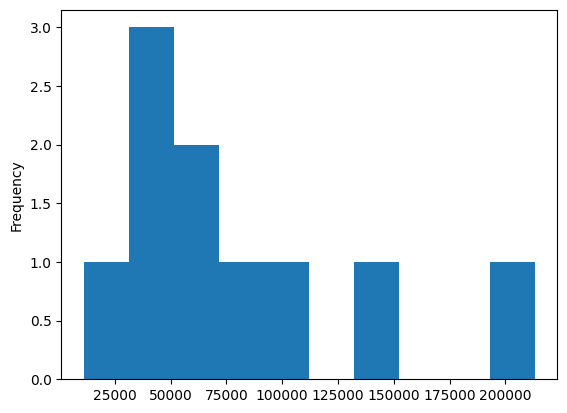

In [93]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [95]:
# Let's try on another dataset
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


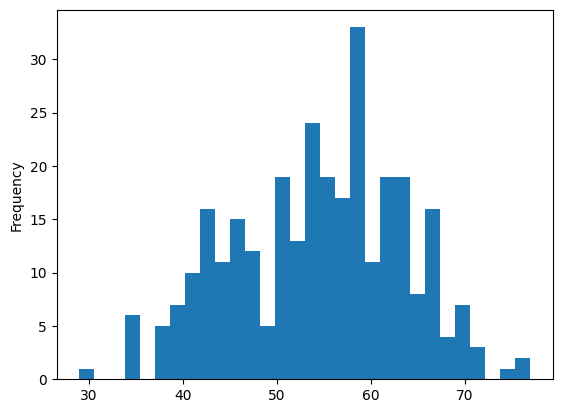

In [98]:
# Create a histogram of age
heart_disease["age"].plot.hist(bins=30);

In [100]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


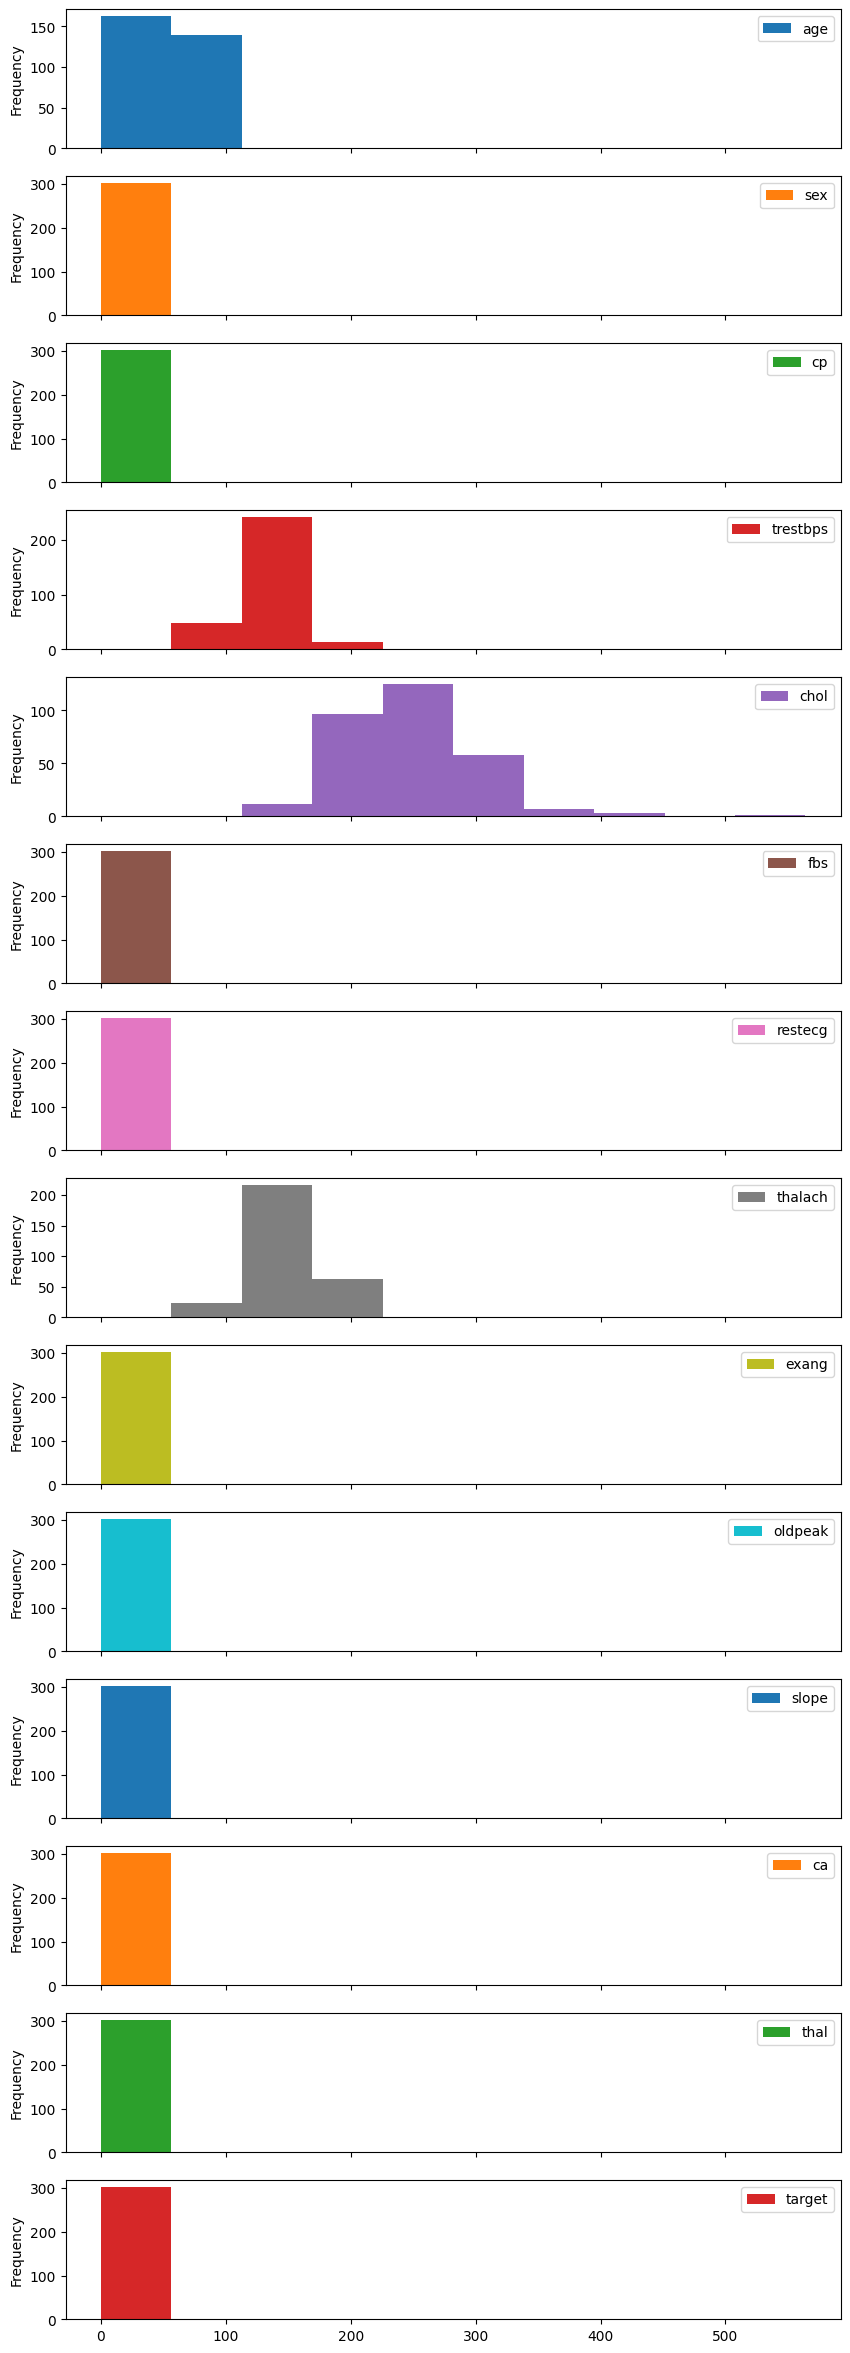

In [104]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);

### Which one shuold you use? (pyplot vs matplotlib OO method)
* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced,use the OO method

In [107]:
over_50=heart_disease[heart_disease["age"]>50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


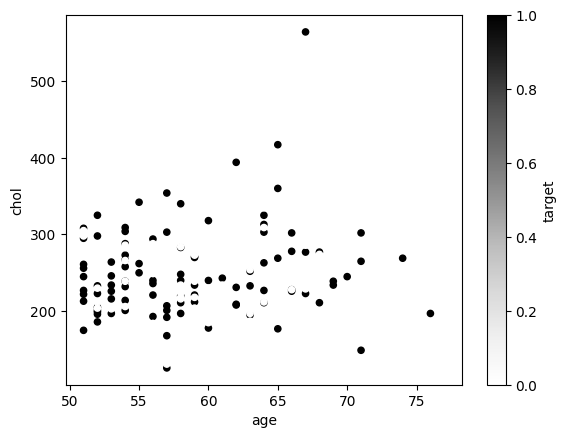

In [108]:
#Pyplot method
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target');

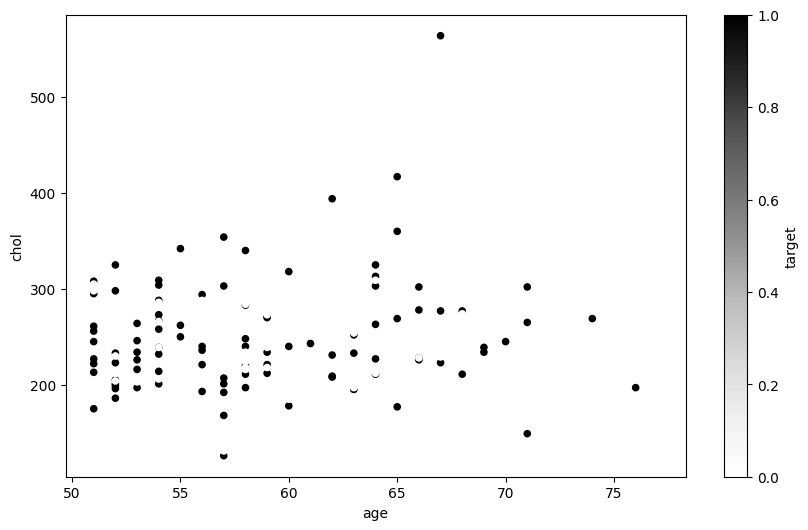

In [113]:
# OO method
fig,ax=plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);
#ax.set_xlim([45,100]);

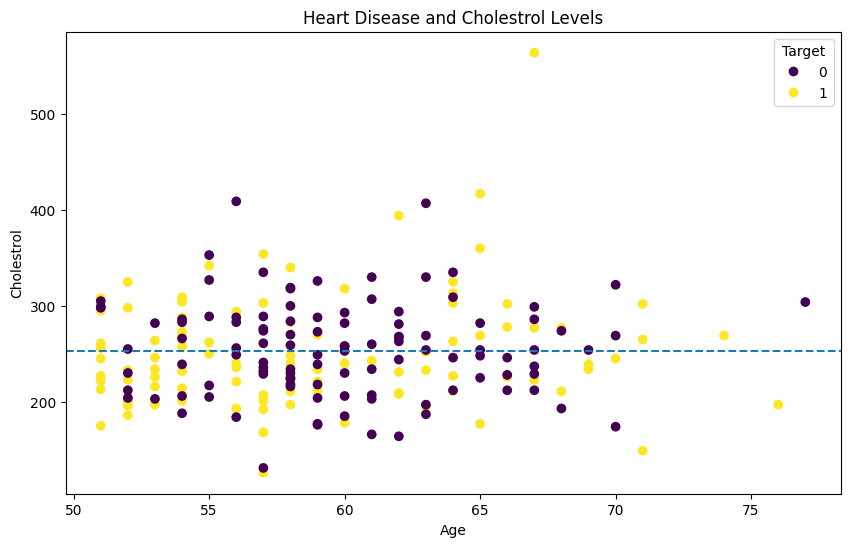

In [120]:
## OO method from scratch
fig,ax=plt.subplots(figsize=(10,6))
# Plot the data
scatter=ax.scatter(x=over_50["age"],
                  y=over_50["chol"],
                  c=over_50["target"])
#Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
      xlabel="Age",
      ylabel="Cholestrol")

# Add a legend 
ax.legend(*scatter.legend_elements(),title="Target");

# Add a horizontal line

ax.axhline(over_50["chol"].mean(),linestyle='--');

In [121]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


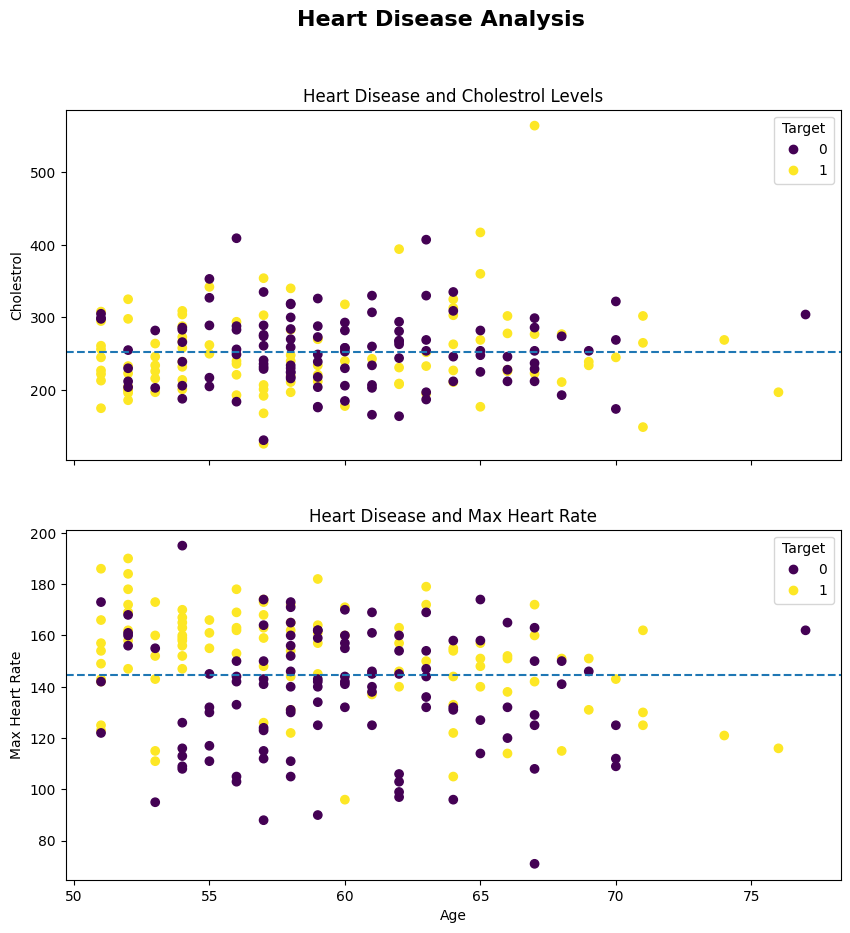

In [128]:
# Subplot of chol,age, thalach
fig,(ax0,ax1)=plt.subplots(nrows=2,
                          ncols=1,
                          figsize=(10,10),
                          sharex=True)
# Add data to ax0

scatter=ax0.scatter(x=over_50["age"],
                   y=over_50["chol"],
                   c=over_50["target"])

#Customize ax0
ax0.set(title="Heart Disease and Cholestrol Levels",
       ylabel="Cholestrol");
ax0.legend(*scatter.legend_elements(),title="Target")
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");
# Add data to ax1
scatter=ax1.scatter(x=over_50["age"],
                   y=over_50["thalach"],
                   c=over_50["target"])
#Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate");
#Add a legend to ax1
ax1.legend(*scatter.legend_elements(),title="Target")
#Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");
# Add a title to the figure
fig.suptitle("Heart Disease Analysis",fontsize=16,fontweight="bold");

## Customizing Matplotlib plots and getting stylish

In [130]:
# See the different style available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

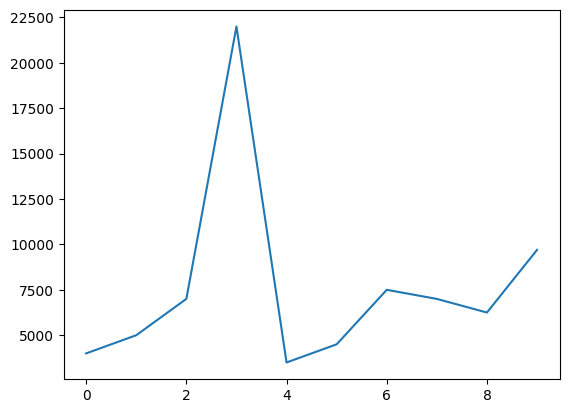

In [131]:
car_sales["Price"].plot();

In [132]:
plt.style.use('seaborn-whitegrid');

/var/folders/sc/q8ylxfc139zgn9207t_55r6h0000gn/T/ipykernel_27568/237954550.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid');


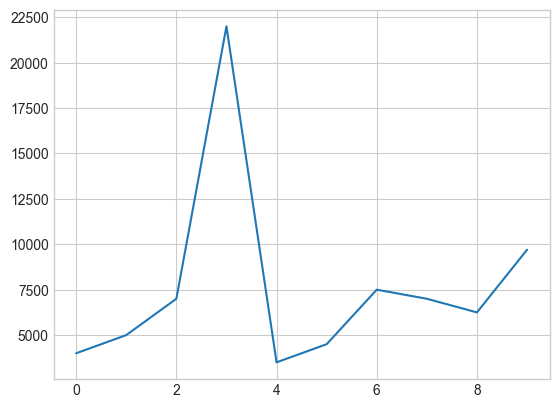

In [134]:
car_sales["Price"].plot();

In [135]:
plt.style.use('seaborn')

/var/folders/sc/q8ylxfc139zgn9207t_55r6h0000gn/T/ipykernel_27568/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


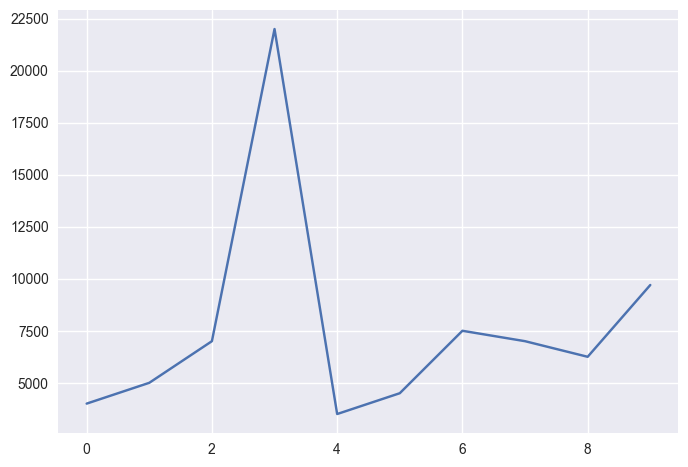

In [137]:
car_sales["Price"].plot();

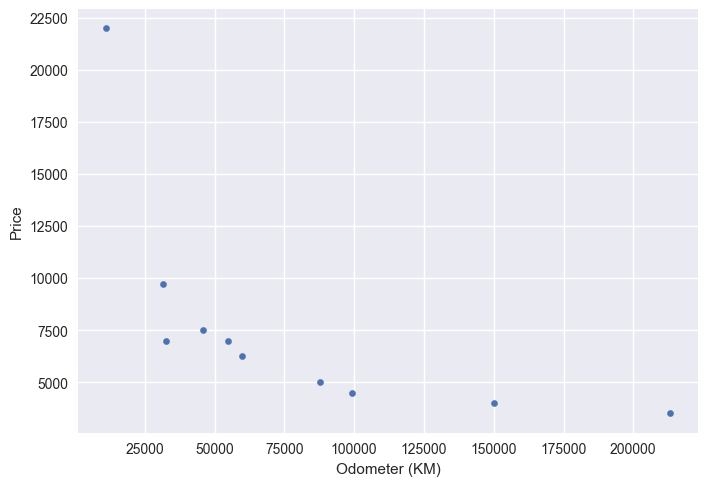

In [138]:
car_sales.plot(x="Odometer (KM)",y="Price",kind="scatter");

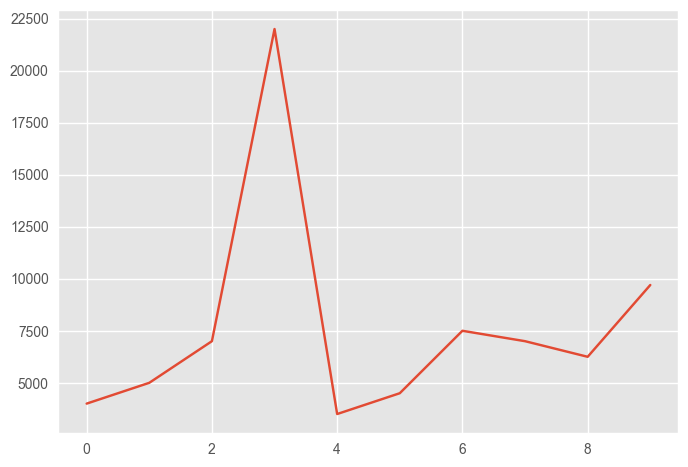

In [139]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [140]:
# Create some data
x=np.random.randn(10,4)
x

array([[ 0.78924439,  1.23194314, -0.15020828,  0.97788621],
       [ 1.39582992,  0.98624764,  0.67128651, -0.51124293],
       [ 0.92151369,  0.42953902,  2.46200449, -2.45847478],
       [-0.86831538,  0.51701267,  0.91176514,  0.62693093],
       [ 1.38042019, -0.38846313, -2.5986843 ,  1.40760589],
       [-0.0071398 ,  0.16700938, -1.03564239, -0.22262881],
       [ 0.18068734,  0.7074764 ,  1.01836655,  1.31683632],
       [ 0.28370673, -1.02922008, -2.11945771, -0.15406076],
       [ 1.80201339,  0.03234848, -0.60374656,  0.01527161],
       [ 0.04925894, -1.74921524,  0.56458811, -1.32736368]])

In [141]:
df=pd.DataFrame(x,columns=['a','b','c','d'])
df

,a,b,c,d
0,0.789244,1.231943,-0.150208,0.977886
1,1.395830,0.986248,0.671287,-0.511243
2,0.921514,0.429539,2.462004,-2.458475
3,-0.868315,0.517013,0.911765,0.626931
4,1.380420,-0.388463,-2.598684,1.407606
5,-0.007140,0.167009,-1.035642,-0.222629
6,0.180687,0.707476,1.018367,1.316836
7,0.283707,-1.029220,-2.119458,-0.154061
8,1.802013,0.032348,-0.603747,0.015272
9,0.049259,-1.749215,0.564588,-1.327364


matplotlib.axes._subplots.AxesSubplot

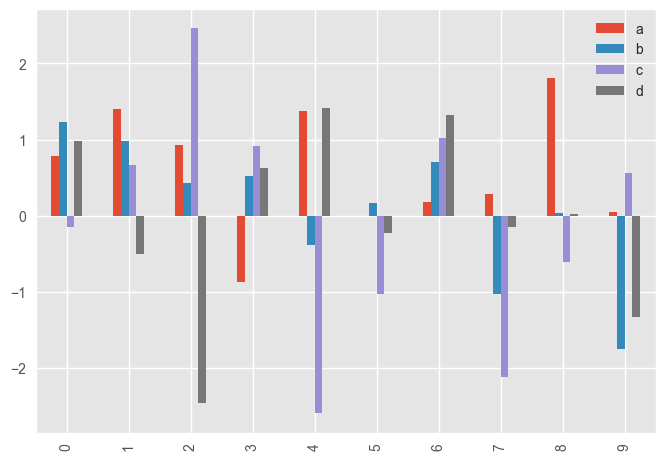

In [142]:
ax =df.plot(kind='bar')
type(ax)

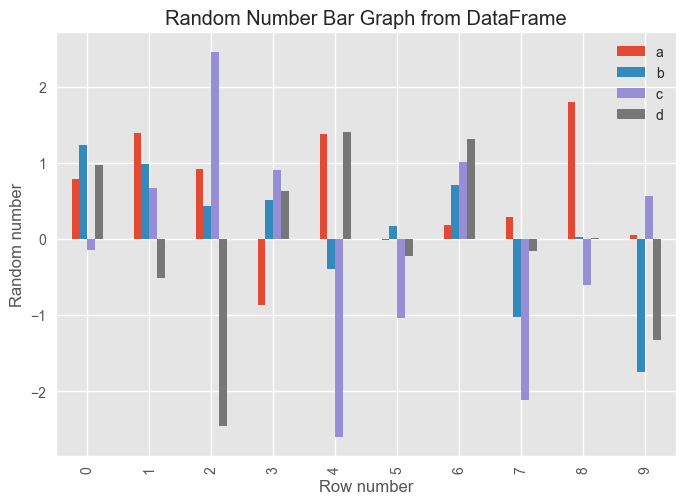

In [143]:
# Customize our plot with set() method
ax=df.plot(kind="bar")
# Add some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame",
      xlabel="Row number",
      ylabel="Random number")

#Make teh legend visible
ax.legend().set_visible(True)

/var/folders/sc/q8ylxfc139zgn9207t_55r6h0000gn/T/ipykernel_27568/153964558.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


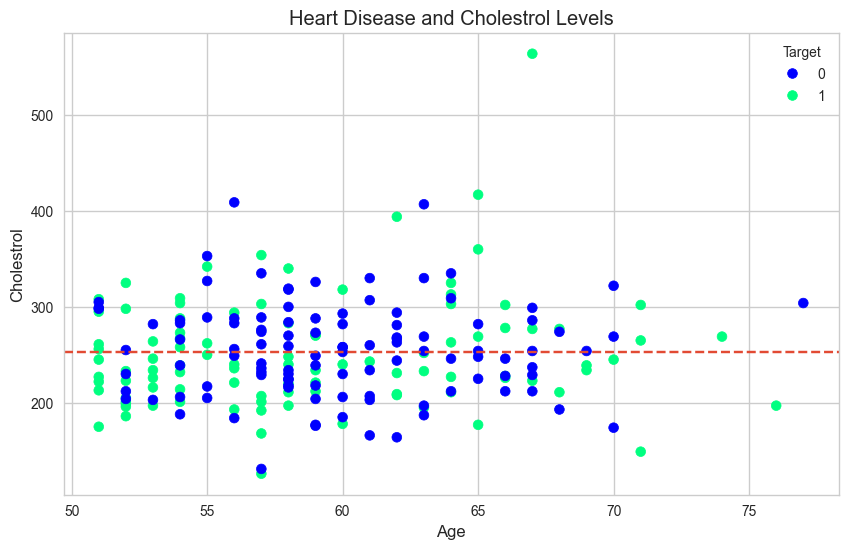

In [147]:
# Set the style
plt.style.use('seaborn-whitegrid')
## OO method from scratch
fig,ax=plt.subplots(figsize=(10,6))
# Plot the data
scatter=ax.scatter(x=over_50["age"],
                  y=over_50["chol"],
                  c=over_50["target"],
                  cmap="winter") # this changes the colour scheme
#Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
      xlabel="Age",
      ylabel="Cholestrol")

# Add a legend 
ax.legend(*scatter.legend_elements(),title="Target");

# Add a horizontal line

ax.axhline(over_50["chol"].mean(),linestyle='--');

This plot shows some information about heart disease dataset...

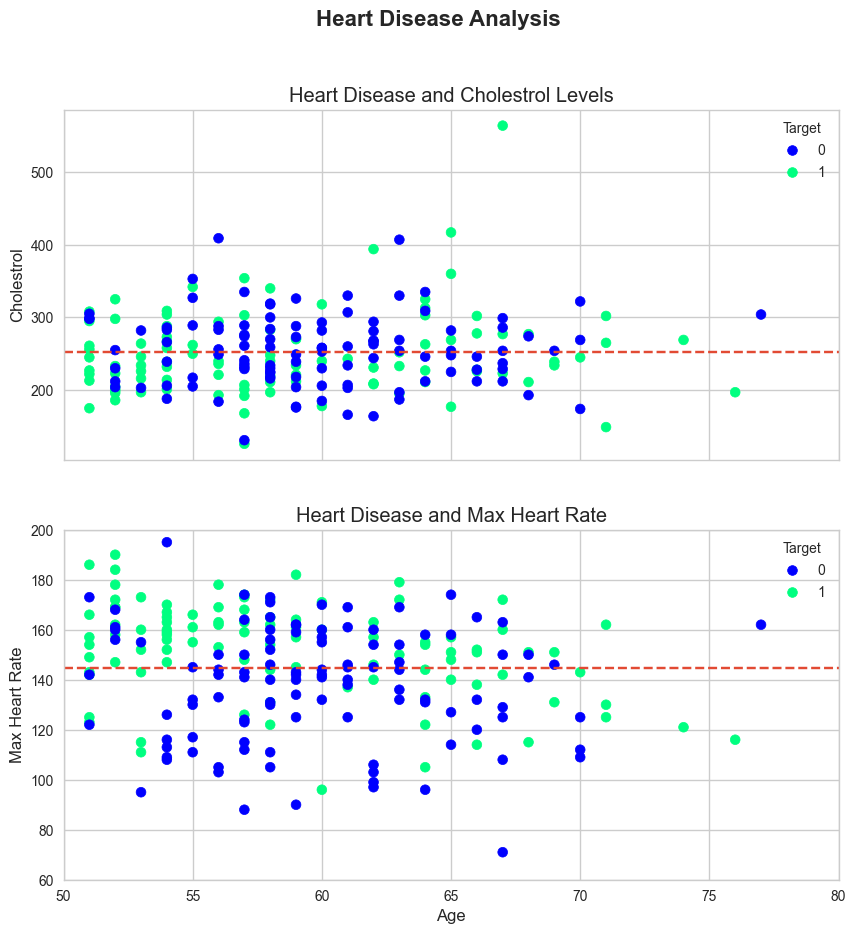

In [152]:
# Customizing the y and x axis limitations


# Subplot of chol,age, thalach
fig,(ax0,ax1)=plt.subplots(nrows=2,
                          ncols=1,
                          figsize=(10,10),
                          sharex=True)
# Add data to ax0

scatter=ax0.scatter(x=over_50["age"],
                   y=over_50["chol"],
                   c=over_50["target"],
                   cmap="winter")

#Customize ax0
ax0.set(title="Heart Disease and Cholestrol Levels",
       ylabel="Cholestrol");
# Change the x axis limits
ax0.set_xlim([50,80])
ax0.legend(*scatter.legend_elements(),title="Target")
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");
# Add data to ax1
scatter=ax1.scatter(x=over_50["age"],
                   y=over_50["thalach"],
                   c=over_50["target"],
                   cmap="winter")
#Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate");
# Change ax1 x axis limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])
#Add a legend to ax1
ax1.legend(*scatter.legend_elements(),title="Target")
#Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");
# Add a title to the figure
fig.suptitle("Heart Disease Analysis",fontsize=16,fontweight="bold");

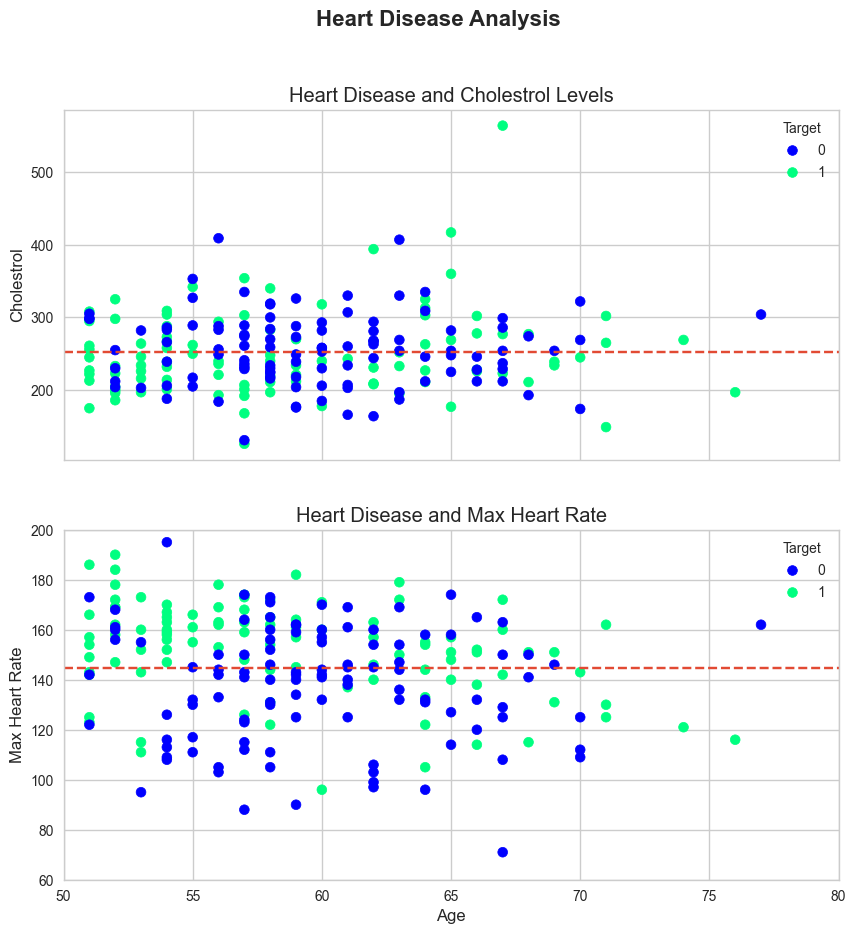

In [154]:
fig

In [155]:
fig.savefig("heart-disease-analysis-saved-with-code.png")